```
Student-1
Name:Oliullah Rafi
ID# 20-42-1
```

```
Student-2
Name:Talukder Md Apon Riaz
ID# 20-42905-1
```



*   Mount your google drive.



In [ ]:
from google.colab import drive

In [ ]:
# mount google drive if you are using Colab
# otherewise, leave it blank
# start writing your code here
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [ ]:
# load/import all required library

# start writing your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn import datasets
from sklearn  import  metrics
from sklearn.utils import shuffle
%matplotlib inline

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
# write task-1 solution

# start writing your code here
np.random.seed(123)
data = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes_prediction_dataset.csv')
data= shuffle(data)
print(data)

       gender    age  hypertension  heart_disease smoking_history    bmi  \
42083  Female  16.00             0              0         No Info  23.29   
71825    Male   6.00             0              0         No Info  17.21   
99535  Female  46.00             0              0            ever  48.12   
47879  Female   0.48             0              0         No Info  16.43   
36734    Male  62.00             1              1         current  36.96   
...       ...    ...           ...            ...             ...    ...   
63206  Female  23.00             0              0         No Info  28.09   
61404  Female  65.00             0              0         No Info  37.75   
17730  Female  11.00             0              0         No Info  27.32   
28030    Male   0.24             0              0         No Info  12.85   
15725  Female   1.24             0              0         No Info  15.45   

       HbA1c_level  blood_glucose_level  diabetes  
42083          5.8                 

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
# write task-2 solution

# start writing your code here

data.fillna(data.mean(), inplace=True)

data.drop_duplicates(inplace=True)

<ipython-input-11-b1ada1253c58>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
42083,Female,16.00,0,0,No Info,23.29,5.8,130,0
71825,Male,6.00,0,0,No Info,17.21,4.8,158,0
99535,Female,46.00,0,0,ever,48.12,4.8,90,0
47879,Female,0.48,0,0,No Info,16.43,6.2,130,0
36734,Male,62.00,1,1,current,36.96,5.0,160,0
...,...,...,...,...,...,...,...,...,...
15377,Male,2.00,0,0,No Info,18.92,6.2,158,0
63206,Female,23.00,0,0,No Info,28.09,5.8,158,0
61404,Female,65.00,0,0,No Info,37.75,4.0,160,0
28030,Male,0.24,0,0,No Info,12.85,6.0,126,0


In [ ]:
missing_value=["N/a"," ",np.nan]
data = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes_prediction_dataset.csv', na_values=missing_value)
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

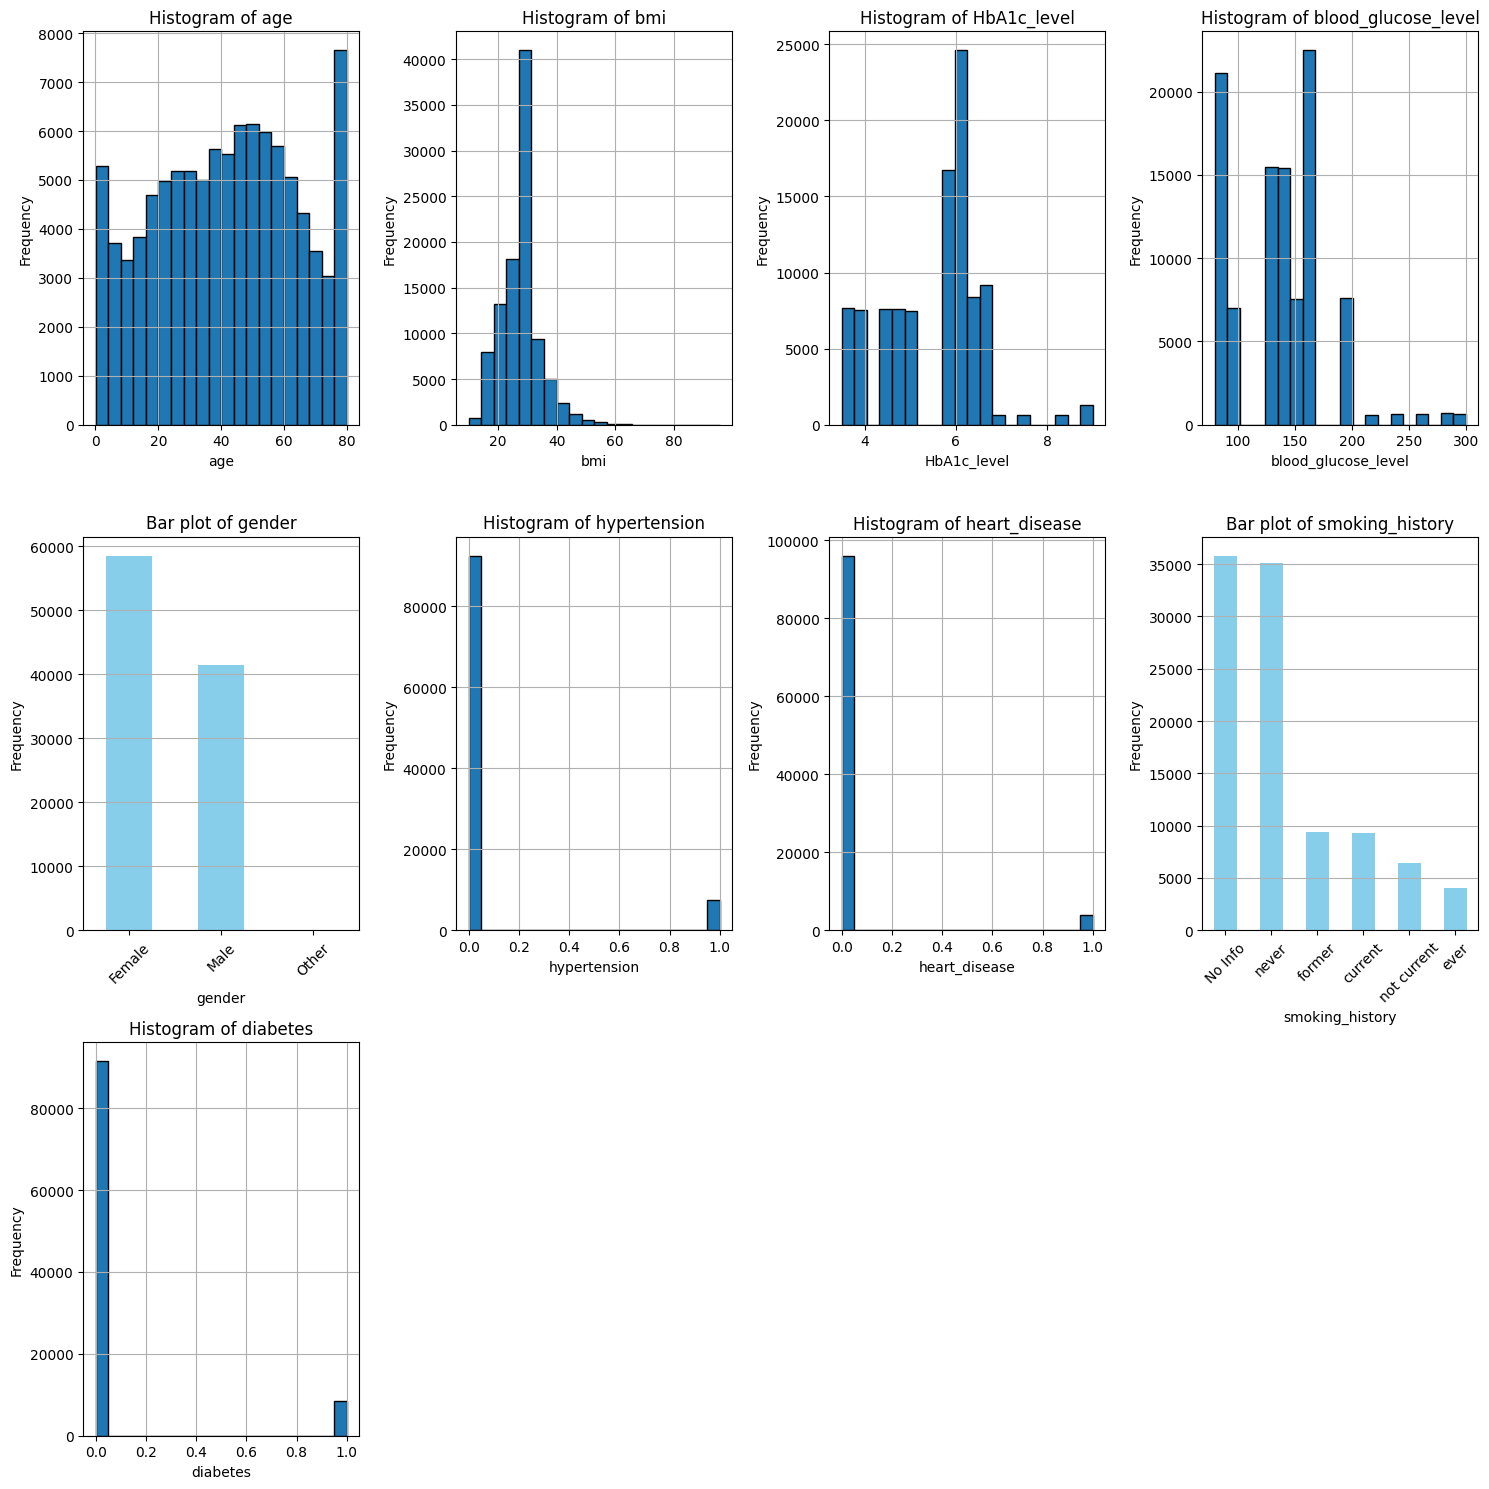

In [ ]:
# write task-3 solution

# start writing your code here


features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
num_features = len(features)

num_cols = 4  # Number of columns in the subplot grid
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, i)
    if data[feature].dtype == 'object':
        data[feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Bar plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
    else:
        plt.hist(data[feature], bins=20, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)

plt.tight_layout()
plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

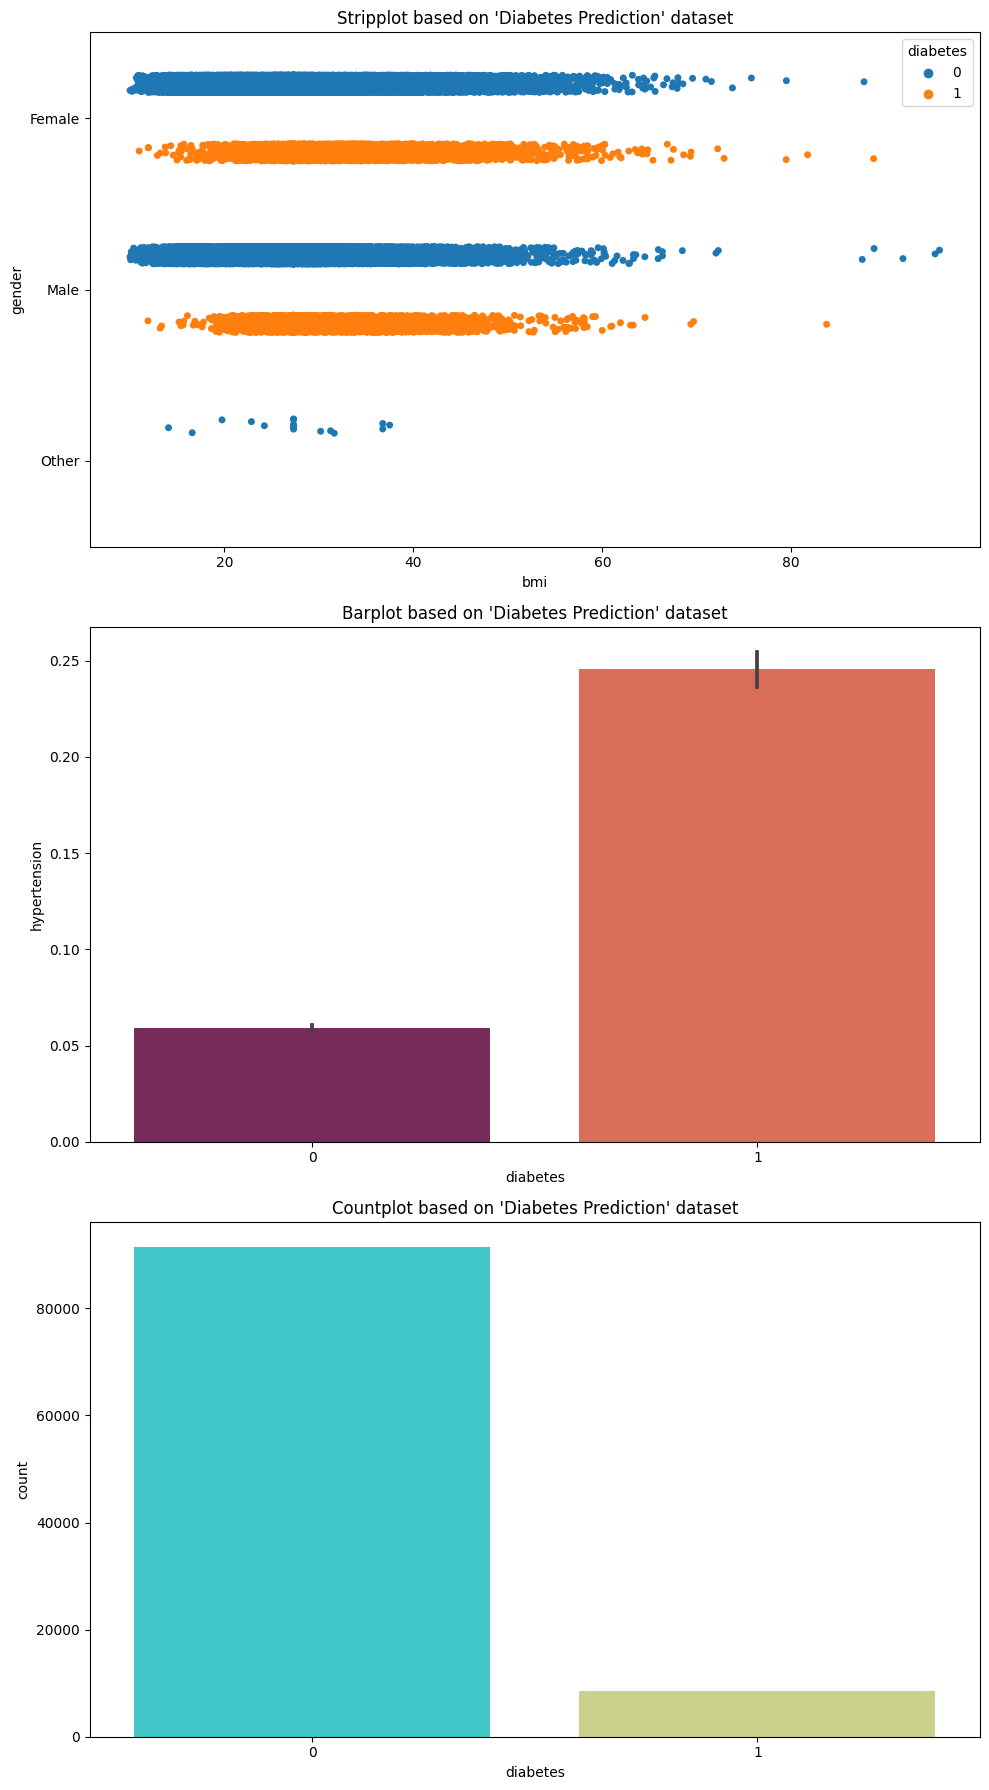

In [ ]:
# write task-4 solution

# start writing your code here

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
#stripplot
sns.stripplot(x='bmi', y='gender', data=data, jitter=True, hue='diabetes', dodge=True, ax=axs[0])
axs[0].set_title("Stripplot based on 'Diabetes Prediction' dataset")

# Barplot
sns.barplot(x="diabetes", y="hypertension", data=data, palette="rocket", ax=axs[1])
axs[1].set_title("Barplot based on 'Diabetes Prediction' dataset")

# Countplot
sns.countplot(x="diabetes", data=data, palette="rainbow", ax=axs[2])
axs[2].set_title("Countplot based on 'Diabetes Prediction' dataset")

plt.tight_layout()
plt.show()



<ipython-input-24-63604deb766b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().round(2)


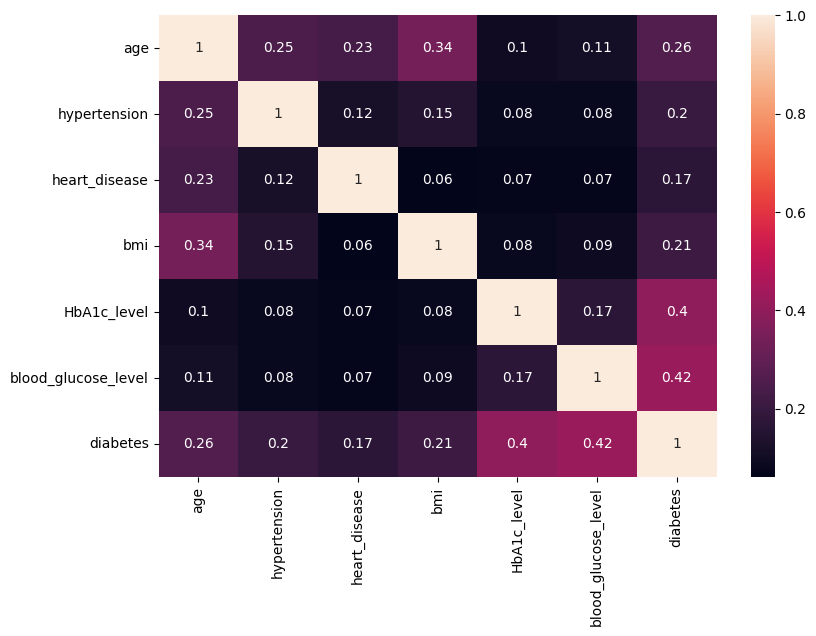

In [ ]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize =(9, 6))
sns.heatmap(data=correlation_matrix,annot=True);

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
# write task-5 solution

# start writing your code here
#Scaling refers to the process of transforming the range of features or variables in your dataset to a standard scale.
#ensure all features contribute equally and are in a similar range.
# write task-5 solution

# start writing your code here


from sklearn.preprocessing import StandardScaler

# Define columns to scale
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Exclude 'diabetes' from scaling process
columns_to_scale_except_diabetes = [col for col in columns_to_scale if col != 'diabetes']

# Scale selected columns
scaler = StandardScaler()
data[columns_to_scale_except_diabetes] = scaler.fit_transform(data[columns_to_scale_except_diabetes])

# Verify the scaled data
print(data.head())  # Display the first few rows of the updated DataFrame


   gender       age  hypertension  heart_disease smoking_history       bmi  \
0  Female  1.692704             0              1           never -0.321056   
1  Female  0.538006             0              0         No Info -0.000116   
2    Male -0.616691             0              0           never -0.000116   
3  Female -0.261399             0              0         current -0.583232   
4    Male  1.515058             1              1         current -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704         0  
1     1.001706            -1.426210         0  
2     0.161108             0.489878         0  
3    -0.492690             0.416183         0  
4    -0.679490             0.416183         0  


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [ ]:
# write task-6 solution

# start writing your code here
print("diabetes",data['diabetes'].unique())
data['diabetes'] = data['diabetes'].replace([0,1],['Negetive', 'Positive'])
data


diabetes ['Negetive' 'Positive']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.692704,0,1,never,-0.321056,1.001706,0.047704,Negetive
1,Female,0.538006,0,0,No Info,-0.000116,1.001706,-1.426210,Negetive
2,Male,-0.616691,0,0,never,-0.000116,0.161108,0.489878,Negetive
3,Female,-0.261399,0,0,current,-0.583232,-0.492690,0.416183,Negetive
4,Male,1.515058,1,1,current,-1.081970,-0.679490,0.416183,Negetive
...,...,...,...,...,...,...,...,...,...
99995,Female,1.692704,0,0,No Info,-0.000116,0.628107,-1.180558,Negetive
99996,Female,-1.771388,0,0,No Info,-1.499343,0.908306,-0.934905,Negetive
99997,Male,1.070944,0,0,former,0.076729,0.161108,0.416183,Negetive
99998,Female,-0.794336,0,0,never,1.220361,-1.426688,-0.934905,Negetive


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your features and target variable
# X contains the features, y contains the target variable

# Selecting the features and target variable
features = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'hypertension', 'heart_disease', 'smoking_history']]
target = data['diabetes']

# Encoding categorical columns if necessary
# (Use pd.get_dummies() or other encoding methods as needed)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)
print("Training set size:", len(X_train))  # or X_train.shape
print("Testing set size:", len(X_test))    # or X_test.shape

Training set size: 80000
Testing set size: 20000


In [ ]:
X =  data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','gender', 'heart_disease', 'hypertension', 'smoking_history']]
X

,age,bmi,HbA1c_level,blood_glucose_level,gender,heart_disease,hypertension,smoking_history
0,1.692704,-0.321056,1.001706,0.047704,Female,1,0,never
1,0.538006,-0.000116,1.001706,-1.426210,Female,0,0,No Info
2,-0.616691,-0.000116,0.161108,0.489878,Male,0,0,never
3,-0.261399,-0.583232,-0.492690,0.416183,Female,0,0,current
4,1.515058,-1.081970,-0.679490,0.416183,Male,1,1,current
...,...,...,...,...,...,...,...,...
99995,1.692704,-0.000116,0.628107,-1.180558,Female,0,0,No Info
99996,-1.771388,-1.499343,0.908306,-0.934905,Female,0,0,No Info
99997,1.070944,0.076729,0.161108,0.416183,Male,0,0,former
99998,-0.794336,1.220361,-1.426688,-0.934905,Female,0,0,never


In [ ]:
y = data['diabetes']
y

0        Negetive
1        Negetive
2        Negetive
3        Negetive
4        Negetive
           ...   
99995    Negetive
99996    Negetive
99997    Negetive
99998    Negetive
99999    Negetive
Name: diabetes, Length: 100000, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,  y_test = train_test_split(X,y,test_size = 0.2, random_state =16)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (80000, 8)
X_test shape:  (20000, 8)
y_train shape:  (80000,)
y_test shape:  (20000,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
# write task-7 solution

# start writing your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
features_encoded = pd.get_dummies(features, columns=['age','bmi','HbA1c_level','gender','hypertension','heart_disease','smoking_history' ])
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, target, test_size=0.2, random_state=123)
naive_bayes_encoded = GaussianNB()
naive_bayes_encoded.fit(X_train_encoded, y_train_encoded)
predictions_encoded = naive_bayes_encoded.predict(X_test_encoded)
accuracy_encoded = accuracy_score(y_test_encoded, predictions_encoded)
print("Accuracy:", accuracy_encoded)

Accuracy: 0.5761


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

In [ ]:
# write task-8 solution

# start writing your code here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
features_encoded = pd.get_dummies(features, columns=['age','bmi','HbA1c_level','gender','hypertension','heart_disease','smoking_history' ])
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, target, test_size=0.2, random_state=123)
conf_matrix_encoded = confusion_matrix(y_test_encoded, predictions_encoded)
print("Confusion Matrix:")
print(conf_matrix_encoded)

Confusion Matrix:
[[9910 8341]
 [ 137 1612]]


•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'y_test_encoded' contains your true labels and 'predictions_encoded' contains the predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, predictions_encoded)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_encoded, predictions_encoded, pos_label='Positive')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test_encoded, predictions_encoded, pos_label='Positive')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_encoded, predictions_encoded, pos_label='Positive')
print("F1 Score:", f1)


Accuracy: 0.5761
Precision: 0.1619612177232995
Recall: 0.9216695254431103
F1 Score: 0.27550846009229185


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
# write task-10 solution

# start writing your code here
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier instance
naive_bayes = GaussianNB()

# Perform 10-fold cross-validation
scores = cross_val_score(naive_bayes, features_encoded, target, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the average accuracy from cross-validation
average_accuracy = scores.mean()
print("Average accuracy:", average_accuracy)

Cross-validation scores: [0.5609 0.5667 0.561  0.5771 0.565  0.5659 0.5608 0.5668 0.5692 0.5648]
Average accuracy: 0.56582
